In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [73]:
## suppress install output
%%capture
## install developer version
!pip install git+https://github.com/nickkunz/smogn.git

In [74]:
import smogn

#### Getting familiar with data

In [128]:
df = pd.read_csv("/content/lets.csv")

In [129]:
df.columns = [x.strip() for x in df.columns]
df.columns

Index(['name', 'spark.app.name', 'spark.executor.instances',
       'spark.executor.cores', 'spark.executor.memory(GB)',
       'input.size (1000 lines)', 'sumCpu (s  )', 'maxHeap (MB  )',
       'maxNonHeap(MB  )', 'sumRun(s  )', 'sumjvmcpu(s  )', 'maxdrheap(MB  )',
       'sumCpu (s  1/5)', 'maxHeap (MB  1/5)', 'maxNonHeap(MB  1/5)',
       'sumRun(s  1/5)', 'sumjvmcpu(s  1/5)', 'maxdrheap(MB  1/5)',
       'sumCpu (s  2/5)', 'maxHeap (MB  2/5)', 'maxNonHeap(MB  2/5)',
       'sumRun(s  2/5)', 'sumjvmcpu(s  2/5)', 'maxdrheap(MB  2/5)',
       'sumCpu (s  3/5)', 'maxHeap (MB  3/5)', 'maxNonHeap(MB  3/5)',
       'sumRun(s  3/5)', 'sumjvmcpu(s  3/5)', 'maxdrheap(MB  3/5)',
       'sumCpu (s  4/5)', 'maxHeap (MB  4/5)', 'maxNonHeap(MB  4/5)',
       'sumRun(s  4/5)', 'sumjvmcpu(s  4/5)', 'maxdrheap(MB  4/5)'],
      dtype='object')

In [130]:
df.drop('name',axis = 1, inplace = True)
df.rename(columns = {'spark.app.name':'op', 'spark.executor.instances':'instances', 'spark.executor.cores':'cores','spark.executor.memory(GB)':'memory', 'sumCpu (s  )': 'cpuTime', 'input.size (1000 lines)': 'input_size'}, inplace = True)

In [131]:
df.columns

Index(['op', 'instances', 'cores', 'memory', 'input_size', 'cpuTime',
       'maxHeap (MB  )', 'maxNonHeap(MB  )', 'sumRun(s  )', 'sumjvmcpu(s  )',
       'maxdrheap(MB  )', 'sumCpu (s  1/5)', 'maxHeap (MB  1/5)',
       'maxNonHeap(MB  1/5)', 'sumRun(s  1/5)', 'sumjvmcpu(s  1/5)',
       'maxdrheap(MB  1/5)', 'sumCpu (s  2/5)', 'maxHeap (MB  2/5)',
       'maxNonHeap(MB  2/5)', 'sumRun(s  2/5)', 'sumjvmcpu(s  2/5)',
       'maxdrheap(MB  2/5)', 'sumCpu (s  3/5)', 'maxHeap (MB  3/5)',
       'maxNonHeap(MB  3/5)', 'sumRun(s  3/5)', 'sumjvmcpu(s  3/5)',
       'maxdrheap(MB  3/5)', 'sumCpu (s  4/5)', 'maxHeap (MB  4/5)',
       'maxNonHeap(MB  4/5)', 'sumRun(s  4/5)', 'sumjvmcpu(s  4/5)',
       'maxdrheap(MB  4/5)'],
      dtype='object')

In [132]:
df.replace([np.inf, -np.inf], np.mean, inplace=True)

#### Dataset Selection 

In [80]:
# Option no1
# df = df.filter(['op', 'instances', 'cores', 'memory', 'input_size', 'cpuTime',
#        'maxHeap (MB  )', 'maxNonHeap(MB  )', 'sumRun(s  )', 'sumjvmcpu(s  )',
#        'maxdrheap(MB  )'], axis=1)

In [ ]:
# #Option no2
# df = df.filter(['op', 'instances', 'cores', 'memory', 'input_size', 'cpuTime',
#        'maxHeap (MB  )', 'maxNonHeap(MB  )', 'sumRun(s  )', 'sumjvmcpu(s  )',
#        'maxdrheap(MB  )', 'sumCpu (s  1/5)', 'maxHeap (MB  1/5)',
#        'maxNonHeap(MB  1/5)', 'sumRun(s  1/5)', 'sumjvmcpu(s  1/5)',
#        'maxdrheap(MB  1/5)'], axis=1)

#Option no3 
# df = df.filter(['op', 'instances', 'cores', 'memory', 'input_size', 'cpuTime',
#        'maxHeap (MB  )', 'maxNonHeap(MB  )', 'sumRun(s  )', 'sumjvmcpu(s  )',
#        'maxdrheap(MB  )','sumCpu (s  2/5)', 'maxHeap (MB  2/5)',
#        'maxNonHeap(MB  2/5)', 'sumRun(s  2/5)', 'sumjvmcpu(s  2/5)',
#        'maxdrheap(MB  2/5)'], axis=1)

# #Option no4
# df = df.filter(['op', 'instances', 'cores', 'memory', 'input_size', 'cpuTime',
#        'maxHeap (MB  )', 'maxNonHeap(MB  )', 'sumRun(s  )', 'sumjvmcpu(s  )',
#        'maxdrheap(MB  )', 'sumCpu (s  3/5)', 'maxHeap (MB  3/5)',
#        'maxNonHeap(MB  3/5)', 'sumRun(s  3/5)', 'sumjvmcpu(s  3/5)',
#        'maxdrheap(MB  3/5)'], axis=1)

#Option no5
# df = df.filter(['op', 'instances', 'cores', 'memory', 'input_size', 'cpuTime',
#        'maxHeap (MB  )', 'maxNonHeap(MB  )', 'sumRun(s  )', 'sumjvmcpu(s  )',
#        'maxdrheap(MB  )','sumCpu (s  4/5)', 'maxHeap (MB  4/5)',
#        'maxNonHeap(MB  4/5)', 'sumRun(s  4/5)', 'sumjvmcpu(s  4/5)',
#        'maxdrheap(MB  4/5)'], axis=1)

In [134]:
# Option no6
df = df.filter(['op', 'instances', 'cores', 'memory', 'input_size', 'cpuTime',
       'maxHeap (MB  )', 'maxNonHeap(MB  )', 'sumRun(s  )', 'sumjvmcpu(s  )',
       'maxdrheap(MB  )','sumCpu (s  2/5)', 'maxHeap (MB  2/5)',
       'maxNonHeap(MB  2/5)', 'sumRun(s  2/5)', 'sumjvmcpu(s  2/5)',
       'maxdrheap(MB  2/5)', 'sumCpu (s  3/5)', 'maxHeap (MB  3/5)',
       'maxNonHeap(MB  3/5)', 'sumRun(s  3/5)', 'sumjvmcpu(s  3/5)',
       'maxdrheap(MB  3/5)'], axis=1)

In [135]:
df.shape

(1688, 23)

#### Little EDA


In [124]:
df.columns

Index(['op', 'instances', 'cores', 'memory', 'input_size', 'cpuTime',
       'maxHeap (MB  )', 'maxNonHeap(MB  )', 'sumRun(s  )', 'sumjvmcpu(s  )',
       'maxdrheap(MB  )'],
      dtype='object')

In [125]:
X_data=df.dtypes[df.dtypes!='object'].index
X_corr=df[X_data]

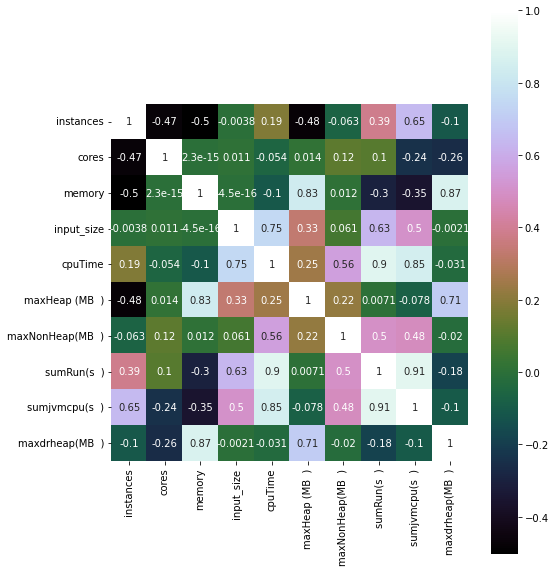

In [126]:
# GETTING Correllation matrix
corr_mat=X_corr.corr(method='pearson')
# plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [ ]:
# #pairplot
sns.pairplot(X_corr)

# #we will log the cpuTime Column
X_corr.cpuTime = np.log(X_corr.cpuTime)

In [85]:
#Correlation with output variable
cor_target = abs(corr_mat["maxHeap (MB  )"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending = False)

maxHeap (MB  )     1.000000
memory             0.834561
maxdrheap(MB  )    0.706294
Name: maxHeap (MB  ), dtype: float64

 One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. 

In [86]:
print(df[["input_size","maxNonHeap(MB  )"]].corr())
print(df[["maxNonHeap(MB  )","sumRun(s  )"]].corr())
print(df[["input_size","sumRun(s  )"]].corr())
print(df[["sumjvmcpu(s  )","sumRun(s  )"]].corr())
print(df[["input_size","sumjvmcpu(s  )"]].corr())
print(df[["sumjvmcpu(s  )","maxNonHeap(MB  )"]].corr())

                  input_size  maxNonHeap(MB  )
input_size          1.000000          0.061104
maxNonHeap(MB  )    0.061104          1.000000
                  maxNonHeap(MB  )  sumRun(s  )
maxNonHeap(MB  )          1.000000     0.496204
sumRun(s  )               0.496204     1.000000
             input_size  sumRun(s  )
input_size     1.000000     0.634598
sumRun(s  )    0.634598     1.000000
                sumjvmcpu(s  )  sumRun(s  )
sumjvmcpu(s  )        1.000000     0.908564
sumRun(s  )           0.908564     1.000000
                input_size  sumjvmcpu(s  )
input_size        1.000000        0.502757
sumjvmcpu(s  )    0.502757        1.000000
                  sumjvmcpu(s  )  maxNonHeap(MB  )
sumjvmcpu(s  )          1.000000          0.482079
maxNonHeap(MB  )        0.482079          1.000000


In [87]:
df[(df.cores == 3)& (df.op == 'LogisticRegressionWithElasticNet  ')].query("cpuTime >50")
# .value_counts().sum()

,op,instances,cores,memory,input_size,cpuTime,maxHeap (MB ),maxNonHeap(MB ),sumRun(s ),sumjvmcpu(s ),maxdrheap(MB )
185,LogisticRegressionWithElasticNet,3,3,1,342,53,507,85,87,105,1192
186,LogisticRegressionWithElasticNet,3,3,1,390,57,555,85,92,109,1192
187,LogisticRegressionWithElasticNet,3,3,1,438,63,579,85,99,116,1192
425,LogisticRegressionWithElasticNet,3,3,2,342,53,814,86,86,105,2830
426,LogisticRegressionWithElasticNet,3,3,2,390,57,853,85,90,108,2830
427,LogisticRegressionWithElasticNet,3,3,2,438,62,880,85,98,115,2830
665,LogisticRegressionWithElasticNet,3,3,3,342,54,1177,85,86,105,4469
666,LogisticRegressionWithElasticNet,3,3,3,390,57,1198,85,90,107,4469
667,LogisticRegressionWithElasticNet,3,3,3,438,64,1250,85,99,118,4469
905,LogisticRegressionWithElasticNet,3,3,4,342,54,1517,85,85,105,6107


In [88]:
max = df["cpuTime"].max()
df[df.cpuTime == max]

,op,instances,cores,memory,input_size,cpuTime,maxHeap (MB ),maxNonHeap(MB ),sumRun(s ),sumjvmcpu(s ),maxdrheap(MB )
19,RandomForestClassifierExample,12,1,1,438,196,523,98,373,470,4488


In [89]:
min = df["cpuTime"].min()
df[df.cpuTime == min]

,op,instances,cores,memory,input_size,cpuTime,maxHeap (MB ),maxNonHeap(MB ),sumRun(s ),sumjvmcpu(s ),maxdrheap(MB )
176,LogisticRegressionWithElasticNet,3,3,1,30,13,354,82,18,54,1192
236,LogisticRegressionWithElasticNet,3,4,1,30,13,382,82,18,52,1192
656,LogisticRegressionWithElasticNet,3,3,3,30,13,716,83,18,52,4469
716,LogisticRegressionWithElasticNet,3,4,3,30,13,482,83,19,54,4469
776,LogisticRegressionWithElasticNet,3,1,4,30,13,687,82,14,51,6107
1016,LogisticRegressionWithElasticNet,3,1,5,30,13,491,82,14,54,7745
1256,LogisticRegressionWithElasticNet,3,1,6,30,13,576,82,14,50,9383
1316,LogisticRegressionWithElasticNet,3,2,6,30,13,705,82,18,51,9383
1496,LogisticRegressionWithElasticNet,3,1,7,30,13,734,82,14,50,11022
1616,LogisticRegressionWithElasticNet,3,3,7,30,13,713,82,18,54,11022


#### One Hot Encoder

In [90]:
mask = df.dtypes == np.object
categorical = df.columns[mask]
categorical

Index(['op'], dtype='object')

In [91]:
num_ohc_cols = (df[categorical].apply(lambda x: x.nunique()).sort_values(ascending=False))
num_ohc_cols

op    5
dtype: int64

In [92]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

data_ohc = df.copy()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
  #this is a sparse array
  new_dat = ohc.fit_transform(data_ohc[[col]])
  #drop original column from original DF
  data_ohc = data_ohc.drop(col, axis=1)
  #get unique names of columns
  cats = ohc.categories_
  #create a column for each OHE column by value
  new_cols = ['_'.join([col,cat]) for cat in cats[0]]
  #create the new Dataset
  new_df = pd.DataFrame(new_dat.toarray(), columns=new_cols)
  #append new data to df
  data_ohc=pd.concat([data_ohc, new_df], axis=1)

y_col = 'cpuTime'

feature_cols = [x for x in data_ohc.columns if x != y_col]

#cleaning data
data_ohc.dropna(inplace = True)
data_ohc.drop_duplicates(keep='first', inplace=True)
data_ohc.reset_index(level=0, inplace=True)

X = data_ohc[feature_cols]
y = data_ohc[y_col]
print(data_ohc.shape)

(1680, 16)


####Smogn

In [94]:
## conduct smogn
data_smogn = smogn.smoter(
    
    ## main arguments
    data = data_ohc,           ## pandas dataframe
    y = 'cpuTime'              ## string ('header name')
)

r_index: 100%|##########| 96/96 [00:00<00:00, 465.46it/s]


In [95]:
data_smogn.shape

(1432, 16)

In [96]:
data_smogn.reset_index(level=0, inplace=True)

In [97]:
## box plot stats - original data 
smogn.box_plot_stats(data_ohc['cpuTime'])['stats']

array([ 13. ,  40. ,  61. ,  91.5, 168. ])

In [98]:
## box plot stats - modified data
smogn.box_plot_stats(data_smogn['cpuTime'])['stats']

array([ 13.,  63., 124., 141., 237.])

In [99]:
%matplotlib inline

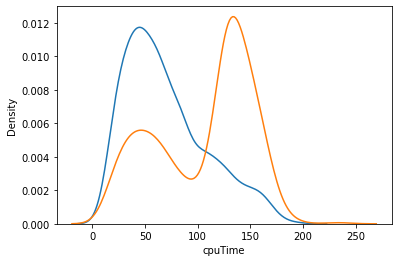

In [100]:
## distribution plot
sns.kdeplot(data_ohc['cpuTime'], label = "Original")
sns.kdeplot(data_smogn['cpuTime'], label = "Modified")
plt.plot()
plt.show()

### Feature Selection

In [48]:
from sklearn.linear_model import RidgeCV, LassoCV
import statsmodels.api as sm
%matplotlib inline

LassoCV



In [117]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 6.140257
Best score using built-in LassoCV: 0.955224


In [118]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 8 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

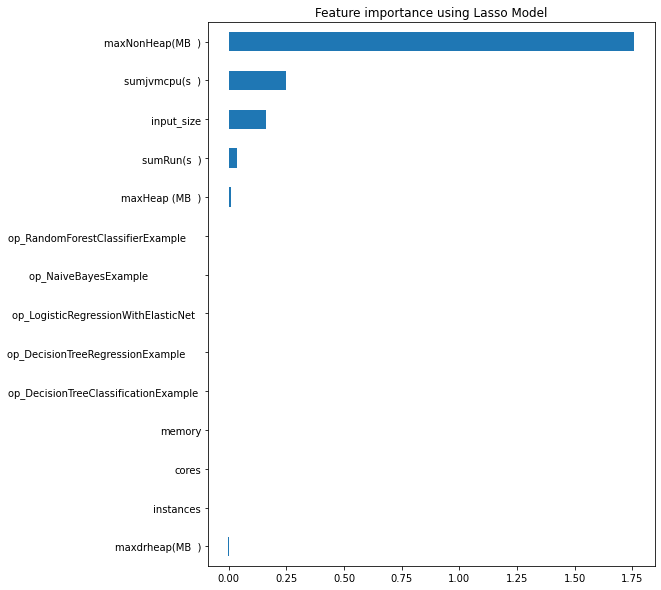

In [119]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### K-Folds

In [101]:
from sklearn.model_selection import KFold, RepeatedKFold

kf = KFold(random_state=72118, n_splits=10, shuffle = True)
                  #  shuffle=True) 
kf.split(X)

<generator object _BaseKFold.split at 0x7f871c169c50>

In [102]:
# This creates a Tuple, for 3 different scenarios(n_plits), that is: train_index, test_index

for train_index, test_index in kf.split(X):
  print("Train index:", train_index[:10], len(train_index))
  print("Test index:", test_index[:10], len(test_index))
  print('')

Train index: [0 1 2 3 4 5 6 7 8 9] 1512
Test index: [ 28  29  44  46  47  54  93 110 113 122] 168

Train index: [ 0  1  2  3  4  7  8 10 11 12] 1512
Test index: [ 5  6  9 21 56 72 76 77 81 83] 168

Train index: [ 0  1  2  3  4  5  6  8  9 10] 1512
Test index: [  7  23  32  33  40  43  51  67 100 103] 168

Train index: [0 1 2 3 4 5 6 7 8 9] 1512
Test index: [ 39  48  75  80  84  86  94 102 104 107] 168

Train index: [0 1 2 3 4 5 6 7 8 9] 1512
Test index: [19 41 45 49 57 61 68 71 78 79] 168

Train index: [ 0  1  2  3  4  5  6  7  9 10] 1512
Test index: [ 8 11 16 17 24 42 52 69 70 85] 168

Train index: [0 1 2 3 4 5 6 7 8 9] 1512
Test index: [12 14 18 30 36 53 58 59 64 87] 168

Train index: [ 1  4  5  6  7  8  9 10 11 12] 1512
Test index: [  0   2   3  22  25  38  60  63 120 130] 168

Train index: [0 1 2 3 4 5 6 7 8 9] 1512
Test index: [10 13 15 20 27 37 50 55 62 65] 168

Train index: [ 0  2  3  5  6  7  8  9 10 11] 1512
Test index: [  1   4  26  31  34  35  66  73  98 101] 168



### Modeling

In [103]:
X = data_smogn[feature_cols]
y = data_smogn[y_col]

#### Linear regression without regularization

In [104]:
# Linear regression without regularization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
import statsmodels.api as sm

scores = []
adj_r2 = []
rmse = []
mae = []

lr1 = LinearRegression()
for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = (X.iloc[train_index, :], X.iloc[test_index, :], y[train_index], y[test_index])
  
  lr1.fit(X_train, y_train)
  y_pred = lr1.predict(X_test)

  # score = r2_score(y_test.values, y_pred)                                     #r2
  # adj_score= 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ) 
  # print(adj_score)  #adj_r2
  # mean = np.sqrt(mean_squared_error(y_test.values, y_pred))                   #rmse
  # mae_score = mean_absolute_error(y_test.values, y_pred)                      #msa

  # scores.append(score) #mse
  # adj_r2.append(adj_score) 
  # rmse.append(mean)
  # mae.append(mae_score)

scoring = ['neg_mean_squared_error','r2','neg_root_mean_squared_error', 'neg_mean_absolute_error' ]
score = cross_validate(lr1, X, y, scoring=scoring, cv=kf)

In [27]:
k = sorted(score.keys())
for i in range(2,len(k)):
  print(k[i], " ",round(np.mean(score[k[i]]),4))

test_neg_mean_absolute_error   -2.8011
test_neg_mean_squared_error   -44.3626
test_neg_root_mean_squared_error   -6.2442
test_r2   0.9791


In [28]:
# np.sqrt(-cross_val_score(lr, X, y, cv=kf,scoring = 'neg_mean_squared_error'))

In [29]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (np.mean(score['test_r2']), np.std(score['test_r2'])))

0.9791 accuracy with a standard deviation of 0.0140


In [30]:
adj_score= 1 - ( 1-score['test_r2'] ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
round(np.mean(adj_score),4)

0.9785

In [31]:
y_pred = cross_val_predict(lr1, X, y, cv=kf)
y_pred.shape

(1432,)

Text(0.5, 1.0, 'Predicted vs True values')

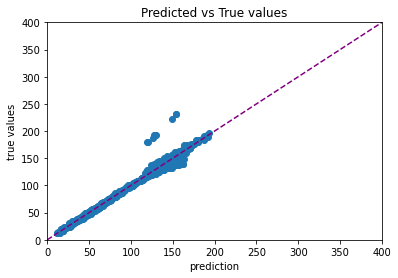

In [32]:
%matplotlib inline
plt.scatter(y_pred, y.values)
plt.plot(np.linspace(0,400,400), np.linspace(0,400,400), c = 'purple', linestyle='--')
plt.xlabel('prediction')
plt.ylabel('true values')
plt.xlim(0,400)
plt.ylim(0,400)
plt.title('Predicted vs True values')

In [122]:
ex_pred = lr1.predict([[12,1,	2,	200,	400,100,	250,	340,	4450,	0.0,0.0,	1.0, 0.0, 0.0]])
ex_pred

array([100.61926318])

#### Linear regression with Regularization

In [105]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

s = MinMaxScaler()
lr2 = LinearRegression()
estimator1 = Pipeline([('scaler', s), ('linear_regression', lr2)])
scoring = ['neg_mean_squared_error','r2','neg_root_mean_squared_error', 'neg_mean_absolute_error' ]
score = cross_validate(estimator1, X, y, scoring=scoring, cv=kf)

k = sorted(score.keys())
for i in range(2,6):
  print(k[i], " ",round(np.mean(score[k[i]]),4))

test_neg_mean_absolute_error   -4.4687
test_neg_mean_squared_error   -47.9323
test_neg_root_mean_squared_error   -6.74
test_r2   0.9772


In [35]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (np.mean(score['test_r2']), np.std(score['test_r2'])))
adj_score= 1 - ( 1-score['test_r2'] ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
round(np.mean(adj_score),4)

0.9791 accuracy with a standard deviation of 0.0139


0.9786

In [36]:
pred = cross_val_predict(estimator1, X, y, cv=kf)

Text(0.5, 1.0, 'Predicted vs True values')

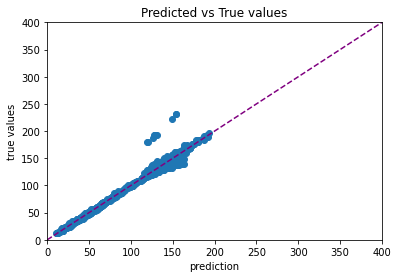

In [37]:
plt.scatter(pred, y.values)
plt.plot(np.linspace(0,400,400), np.linspace(0,400,400), c = 'purple', linestyle='--')
plt.xlabel('prediction')
plt.ylabel('true values')
plt.xlim(0,400)
plt.ylim(0,400)
plt.title('Predicted vs True values')

#### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polis = [2, 3, 4]

lr3 = LinearRegression()

scores = []
r2 = []
adj_r2 = []


for poli in polis:
  pf = PolynomialFeatures(poli)
  estimator = Pipeline([('make_higher_degree', pf),('scaler', s), ('linear_reg', lr3)])

  scoring = ['neg_mean_squared_error','r2','neg_root_mean_squared_error', 'neg_mean_absolute_error' ]
  score = cross_validate(estimator, X, y, scoring=scoring, cv=kf)
  k = sorted(score.keys())
  print("poli: ", poli, "\n")
  for i in range(2,6):
      print( k[i], " ",round(np.mean(score[k[i]]),4))

  score = cross_val_score(estimator, X, y, cv=kf)
  r2.append(score)
  adj_score= 1 - ( 1-score) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
  adj_r2.append(adj_score)
  predictions = cross_val_predict(estimator, X, y, cv=kf)
  score2 = r2_score(y, predictions)
  print (poli, " ", np.sqrt(mean_squared_error(y,predictions)))
  scores.append(score2)

poli:  2 

test_neg_mean_absolute_error   -3.3056
test_neg_mean_squared_error   -37.5976
test_neg_root_mean_squared_error   -5.8386
test_r2   0.9826
2   6.131891269234934
poli:  3 

test_neg_mean_absolute_error   -270.057
test_neg_mean_squared_error   -1430729.3835
test_neg_root_mean_squared_error   -884.8444
test_r2   -659.28
3   1195.377214626781
poli:  4 

test_neg_mean_absolute_error   -96.7054
test_neg_mean_squared_error   -176746.8644
test_neg_root_mean_squared_error   -278.1809
test_r2   -79.0023
4   420.15670742830946


In [ ]:
np.mean(r2[0])

-3157959534561467.0

In [ ]:
r2

In [ ]:
np.mean(adj_r2, axis=1)

array([-3.24410631e+15, -1.57292220e+06, -1.25548593e+08])

In [ ]:
adj_score= 1 - ( 1-(0.9826) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
adj_score

0.9822780071174377

In [106]:
from sklearn.preprocessing import PolynomialFeatures
lr3 = LinearRegression()
pf = PolynomialFeatures(2)
estimator2 = Pipeline([('make_higher_degree', pf),('scaler', s), ('linear_reg', lr3)])
scoring = ['neg_mean_squared_error','r2','neg_root_mean_squared_error', 'neg_mean_absolute_error' ]
score = cross_validate(estimator2, X, y, scoring=scoring, cv=kf)
score

{'fit_time': array([0.02005053, 0.01807022, 0.01875257, 0.0194757 , 0.01871228,
        0.01886344, 0.01928139, 0.01858687, 0.01800227, 0.01727581]),
 'score_time': array([0.00375247, 0.00329328, 0.00370979, 0.00362587, 0.00350523,
        0.00381637, 0.00381494, 0.00353503, 0.00342536, 0.00332212]),
 'test_neg_mean_squared_error': array([ -9.39951967, -11.65921279, -11.35560757, -14.38327005,
        -12.18929037, -50.97065756, -13.69294715,  -9.15448772,
        -53.72708574, -57.01722282]),
 'test_r2': array([0.99600922, 0.99372287, 0.99517355, 0.99323022, 0.99468133,
        0.9764637 , 0.99275579, 0.99544469, 0.97586309, 0.97050755]),
 'test_neg_root_mean_squared_error': array([-3.06586361, -3.41455895, -3.36980824, -3.79252819, -3.49131642,
        -7.13937375, -3.70039824, -3.0256384 , -7.32987624, -7.55097496]),
 'test_neg_mean_absolute_error': array([-2.13964584, -2.40518528, -2.11354863, -2.60314685, -2.17595539,
        -2.73086484, -2.57718556, -2.15411932, -2.85117324, -2.

In [ ]:
#Lasso Regression with the best estimator from above
#More data?
best_estimator = Pipeline([('make_higher_degree', PolynomialFeatures(degree=2)), ('scaler', s), ('polynomial_regression', lr1)])

best_estimator.fit(X,y)
best_estimator.score(X,y)

0.7956800573316195

In [ ]:
pred = cross_val_predict(best_estimator, X, y, cv=kf)

Text(0.5, 1.0, 'Predicted vs True values')

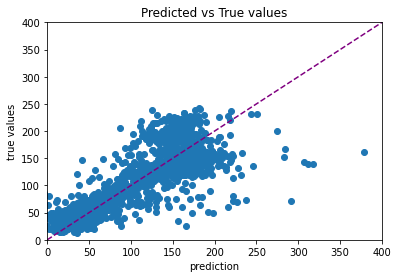

In [ ]:
plt.scatter(pred, y.values)
plt.plot(np.linspace(0,400,400), np.linspace(0,400,400), c = 'purple', linestyle='--')
plt.xlabel('prediction')
plt.ylabel('true values')
plt.xlim(0,400)
plt.ylim(0,400)
plt.title('Predicted vs True values')

#### Lasso with Regularization

In [ ]:
alphas = np.geomspace(0.01, 12, 10)
#alphas = np.geomspace(1, 15, 10)
#alphas = np.geomspace(0.1,2,10)

from sklearn.linear_model import Lasso

scores_lasso = []
coefs = []
r2 = []
adj_r2 = []

for alpha in alphas:
  las1 = Lasso(alpha=alpha, max_iter=100000)
  estimator = Pipeline([('scaler', s), ('lasso_regression', las1)])
  scoring = ['neg_mean_squared_error','r2','neg_root_mean_squared_error', 'neg_mean_absolute_error' ]
  score = cross_validate(estimator, X, y, scoring=scoring, cv=kf)
  k = sorted(score.keys())
  
  for i in range(2,len(k)):
      print( "alpha: ", alpha, " ", k[i], " ",round(np.mean(score[k[i]]),4))

  
  # score = cross_val_score(estimator, X, y, cv=kf)
  # r2.append(score)
  # adj_score= 1 - ( 1-score) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
  # adj_r2.append(adj_score)
  # predictions = cross_val_predict(estimator, X, y, cv=kf)
  # print('mse :', alpha, " ", np.sqrt(mean_squared_error(y,predictions)))
  # score2 = r2_score(y, predictions)
  # scores_lasso.append(score2)

alpha:  0.01   test_neg_mean_absolute_error   -2.9232
alpha:  0.01   test_neg_mean_squared_error   -35.2188
alpha:  0.01   test_neg_root_mean_squared_error   -5.6176
alpha:  0.01   test_r2   0.9837
alpha:  0.02198524195609481   test_neg_mean_absolute_error   -2.9883
alpha:  0.02198524195609481   test_neg_mean_squared_error   -35.6045
alpha:  0.02198524195609481   test_neg_root_mean_squared_error   -5.6521
alpha:  0.02198524195609481   test_r2   0.9836
alpha:  0.04833508638680315   test_neg_mean_absolute_error   -3.1126
alpha:  0.04833508638680315   test_neg_mean_squared_error   -36.4711
alpha:  0.04833508638680315   test_neg_root_mean_squared_error   -5.732
alpha:  0.04833508638680315   test_r2   0.9832
alpha:  0.10626585691826111   test_neg_mean_absolute_error   -3.4647
alpha:  0.10626585691826111   test_neg_mean_squared_error   -39.6975
alpha:  0.10626585691826111   test_neg_root_mean_squared_error   -6.0219
alpha:  0.10626585691826111   test_r2   0.9816
alpha:  0.2336280576019722   

In [107]:
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.1, max_iter=100000)
estimator3 = Pipeline([('scaler', s), ('lasso_regression', las)])
scoring = ['neg_mean_squared_error','r2','neg_root_mean_squared_error', 'neg_mean_absolute_error' ]
score = cross_validate(estimator3, X, y, scoring=scoring, cv=kf)

In [108]:
k = sorted(score.keys())
for i in range(2,len(k)):
      print( round(np.mean(score[k[i]]),4))

-5.0333
-57.4417
-7.4353
0.9728


In [ ]:
adj_score= 1 - ( 1-(0.9711) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
adj_score

0.970814467184192

In [ ]:
#Lasso Regression with the best estimator from above
best_estimator = Pipeline([('scaler', s), ('lasso_regression', Lasso(alpha=10, max_iter=100000))])

best_estimator.fit(X,y)
best_estimator.score(X,y)

0.21422875149087328

In [ ]:
pred = cross_val_predict(estimator3, X, y, cv=kf)

Text(0.5, 1.0, 'Predicted vs True values')

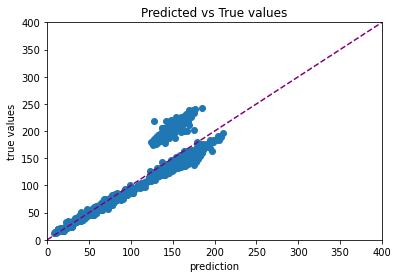

In [ ]:
plt.scatter(pred, y.values)
plt.plot(np.linspace(0,400,400), np.linspace(0,400,400), c = 'purple', linestyle='--')
plt.xlabel('prediction')
plt.ylabel('true values')
plt.xlim(0,400)
plt.ylim(0,400)
plt.title('Predicted vs True values')

####Lasso Regression with Polynomial Regularization

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

pf = PolynomialFeatures(degree=2)
s = StandardScaler()

alphas = np.geomspace(1, 15, 10)
#alphas = np.geomspace(0.001, 10, 5)
#alphas = np.geomspace(0.1,12,10)

r2 = []

for alpha in alphas:
  las2 = Lasso(alpha=alpha, max_iter=100000)
  scoring = ['neg_mean_squared_error','r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error' ]
 
  estimator4 = Pipeline([('make_higher_degree', pf), ('scaler', s), ('lasso_regression', las2)])
  score = cross_validate(estimator4, X, y, scoring=scoring, cv=kf)
  r2.append(score)
  k = sorted(score.keys())
  
  print( "alpha: ", alpha, " ")
  for i in range(2,len(k)):
      print( k[i], " ",round(np.mean(score[k[i]]),4))
  print("\n")


In [ ]:
for i in range(0,10):
  print(np.mean(r2[i]['test_r2']))

0.8291301712525317
0.8280115426170681
0.8268046581400215
0.8254198958667194
0.8229804737247447
0.8184456974674594
0.8101181661835186
0.7994141191902674
0.7814822495931406
0.7492287549293484


In [113]:
las = Lasso(alpha=0.1, max_iter=100000)
scoring = ['neg_mean_squared_error','r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error' ]

estimator4 = Pipeline([('make_higher_degree', pf), ('scaler', s), ('lasso_regression', las)])
score = cross_validate(estimator4, X, y, scoring=scoring, cv=kf)

In [114]:
k = sorted(score.keys())
for i in range(2,len(k)):
      print( round(np.mean(score[k[i]]),4))

-2.7355
-27.3879
-4.8445
0.9869


In [ ]:
adj_score= 1 - ( 1-(0.826) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
adj_score

0.8212534099066762

In [ ]:
#Lasso Regression with the best estimator from above
best_estimator = Pipeline([('make_higher_degree', PolynomialFeatures(degree=3)), ('scaler', s), ('lasso_regression', Lasso(alpha=10, max_iter=100000))])

best_estimator.fit(X,y)
best_estimator.score(X,y)

0.7919156628586127

In [ ]:
pred = cross_val_predict(estimator4, X, y, cv=kf)

In [ ]:
%matplotlib inline

Text(0.5, 1.0, 'Predicted vs True values')

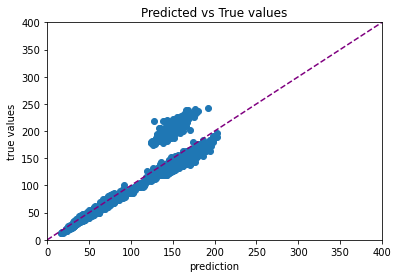

In [ ]:
plt.scatter(pred, y.values)
plt.plot(np.linspace(0,400,400), np.linspace(0,400,400), c = 'purple', linestyle='--')
plt.xlabel('prediction')
plt.ylabel('true values')
plt.xlim(0,400)
plt.ylim(0,400)
plt.title('Predicted vs True values')

####Ridge Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

poli = 2
#alphas = np.geomspace(9, 12, 4)
alphas = np.geomspace(5, 20, 10)
#alphas = np.geomspace(0.1,2,20)

adj_r2=[]

pf = PolynomialFeatures(poli)
for alpha in alphas:
  rid = Ridge(alpha=alpha, max_iter=100000)

  scoring = ['neg_mean_squared_error','r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error' ]
  estimator = Pipeline([('make_higher_degree', pf), ('scaler', s), ('ridge_regression', rid)])
  score = cross_validate(estimator, X, y, scoring=scoring, cv=kf)
  # print(score['test_r2'])

  adj_score= 1 - ( 1-np.mean(score['test_r2'])) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
  adj_r2.append(adj_score)
  print(adj_score)

  k = sorted(score.keys())
  print( "alpha: ", alpha, " ")
  for i in range(2,len(k)):
      print( k[i], " ",round(np.mean(score[k[i]]),4))
  print("\n")

0.9846241747226402
alpha:  5.0  
test_neg_mean_absolute_error   -2.5994
test_neg_mean_squared_error   -32.6928
test_neg_root_mean_squared_error   -5.3579
test_r2   0.9849


0.9846245052036922
alpha:  5.832645197880583  
test_neg_mean_absolute_error   -2.5995
test_neg_mean_squared_error   -32.6935
test_neg_root_mean_squared_error   -5.3576
test_r2   0.9849


0.9846222785733024
alpha:  6.803950000871885  
test_neg_mean_absolute_error   -2.6006
test_neg_mean_squared_error   -32.6994
test_neg_root_mean_squared_error   -5.3578
test_r2   0.9849


0.9846171790156971
alpha:  7.9370052598409995  
test_neg_mean_absolute_error   -2.6029
test_neg_mean_squared_error   -32.7113
test_neg_root_mean_squared_error   -5.3586
test_r2   0.9849


0.9846088355454524
alpha:  9.258747122872906  
test_neg_mean_absolute_error   -2.606
test_neg_mean_squared_error   -32.7298
test_neg_root_mean_squared_error   -5.3602
test_r2   0.9849


0.9845968212490984
alpha:  10.800597388923064  
test_neg_mean_absolute_error   

In [115]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=1, max_iter=100000)
scoring = ['neg_mean_squared_error','r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error' ]
estimator5 = Pipeline([('make_higher_degree', pf), ('scaler', s), ('ridge_regression', rid)])
score = cross_validate(estimator5, X, y, scoring=scoring, cv=kf)
score

{'fit_time': array([0.01192093, 0.00917292, 0.00941038, 0.00942755, 0.0093534 ,
        0.00917912, 0.00983071, 0.00942564, 0.00925326, 0.00918484]),
 'score_time': array([0.00374508, 0.00985122, 0.00329995, 0.00320697, 0.00362539,
        0.00324678, 0.00324178, 0.00323343, 0.00316095, 0.00331473]),
 'test_neg_mean_squared_error': array([ -9.29710858,  -9.91427319, -10.74383467, -11.53546294,
        -12.01476536, -52.61272078, -12.39942165,  -8.4974684 ,
        -57.48383028, -59.62797165]),
 'test_r2': array([0.9960527 , 0.99466232, 0.99543357, 0.99457059, 0.99475748,
        0.97570546, 0.99344013, 0.99577163, 0.97417537, 0.96915713]),
 'test_neg_root_mean_squared_error': array([-3.04911603, -3.14869389, -3.27777892, -3.39638969, -3.46623216,
        -7.25346268, -3.52128125, -2.91504175, -7.58180917, -7.72191502]),
 'test_neg_mean_absolute_error': array([-2.15627081, -2.27218997, -2.14901682, -2.28247658, -2.30687905,
        -2.93637739, -2.45005466, -2.04743171, -3.01397369, -2.

In [ ]:
best_estimator = Pipeline([('make_higher_degree', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', s), ('ridge_regression', Ridge(alpha=10))])

best_estimator.fit(X,y)
best_estimator.score(X,y)

0.8540919751512613

In [ ]:
pred = cross_val_predict(estimator5, X, y, cv=kf)

Text(0.5, 1.0, 'Predicted vs True values')

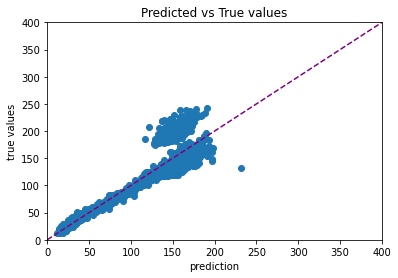

In [ ]:
plt.scatter(pred, y.values)
plt.plot(np.linspace(0,400,400), np.linspace(0,400,400), c = 'purple', linestyle='--')
plt.xlabel('prediction')
plt.ylabel('true values')
plt.xlim(0,400)
plt.ylim(0,400)
plt.title('Predicted vs True values')

#### Gradient Boosting Regression

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

gbr_params = {'n_estimators': 2000,
          'max_depth': 2,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
scores = []
gbr = GradientBoostingRegressor(**gbr_params)
s = StandardScaler()
scoring = ['neg_mean_squared_error','r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error' ]
estimator6 = Pipeline([('scaler', s), ('gbr_regression', gbr)])
score = cross_validate(estimator6, X, y, scoring=scoring, cv=kf)

In [47]:
k = sorted(score.keys())
for i in range(2,len(k)):
    print( k[i], " ",round(np.mean(score[k[i]]),4))
adj_score= 1 - ( 1-np.mean(score['test_r2'])) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adj_score)

test_neg_mean_absolute_error   -3.3023
test_neg_mean_squared_error   -43.0355
test_neg_root_mean_squared_error   -6.3407
test_r2   0.9797
0.97909797094945


In [ ]:
best_estimator = Pipeline([('scaler', s), ('ridge_regression', GradientBoostingRegressor(**gbr_params))])

best_estimator.fit(X,y)
best_estimator.score(X,y)

0.9884163520375345

In [ ]:
pred = cross_val_predict(estimator6, X, y, cv=kf)

In [ ]:
%matplotlib inline

Text(0.5, 1.0, 'Predicted vs True values')

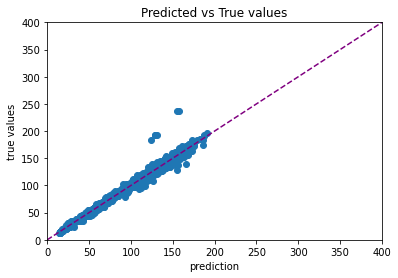

In [ ]:
plt.scatter(pred, y.values)
plt.plot(np.linspace(0,400,400), np.linspace(0,400,400), c = 'purple', linestyle='--')
plt.xlabel('prediction')
plt.ylabel('true values')
plt.xlim(0,400)
plt.ylim(0,400)
plt.title('Predicted vs True values')


### Algorithmic Comparison

In [120]:
# prepare configuration for cross validation test harness
random_state=72118 #seed
# prepare models
models = []
models.append(('LR', lr1))
models.append(('LR-REG', estimator1))
models.append(('POLY', estimator2))
models.append(('LAS-REG', estimator3))
models.append(('LAS-POLY', estimator4))
models.append(('RID', estimator5))
models.append(('GBR', estimator6))
# evaluate each model in turn
results = []
names = []
# scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=72118, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.977270 (0.011140)
LR-REG: 0.977233 (0.011117)
POLY: 0.988385 (0.009398)
LAS-REG: 0.972802 (0.011036)
LAS-POLY: 0.986946 (0.010915)
RID: 0.988373 (0.010194)
GBR: 0.986651 (0.009180)


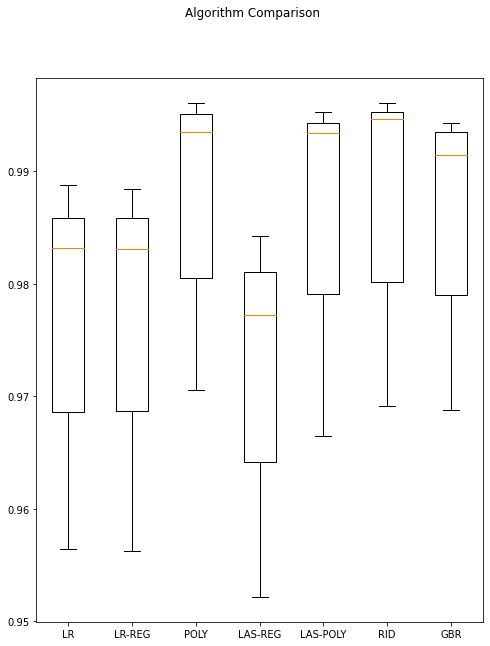

In [121]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()